<a href="https://colab.research.google.com/github/SaumitC/HealthCare-Dataset-Analysis/blob/main/Healthcare_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Data Analysis
- By Saumit Chinchkhandi

### Step 1: Installing and importing necessary libraries

In [ ]:
!pip install opendatasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step 2: Creating Secrets and environment variables to store Kaggle username and key for accessing Kaggle API for downloading Healthcare dataset.

In [ ]:
import os
from google.colab import userdata

os.environ['KAGGLE_USERNAME'] = userdata.get('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY'] = userdata.get('KAGGLE_KEY')

print(f"KAGGLE_USERNAME: {'Username Present!' if os.environ.get('KAGGLE_USERNAME') else 'No Username'}")
print(f"KAGGLE_KEY set: {'Key Present!' if os.environ.get('KAGGLE_KEY') else 'No Key'}")

import kaggle

kaggle.api.dataset_download_files('prasad22/healthcare-dataset', path='.', unzip=True)

KAGGLE_USERNAME: Username Present!
KAGGLE_KEY set: Key Present!
Dataset URL: https://www.kaggle.com/datasets/prasad22/healthcare-dataset


### Step 3: Using a dataframe to store data from the dataset .csv file pulled from Kaggle

In [ ]:
data = pd.read_csv("/content/healthcare_dataset.csv")

### Step 4: Data.head() will give first 5 rows of the dataset

In [ ]:
data.head()


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### Step 5: data.info() and data.describe() will give information about different columns in the dataset

In [ ]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


### Step 6: Counting the unique values in Medical Condition column for different conditions

In [ ]:
data['Medical Condition'].value_counts()

,count
Medical Condition,
Arthritis,9308
Diabetes,9304
Hypertension,9245
Obesity,9231
Cancer,9227
Asthma,9185


### Step 7: Using GroupBy for grouping blood types based on Gender and displaying count for each group.

In [ ]:
blood_gender_group = data.groupby(['Blood Type', 'Gender']).size().reset_index(name='Record Count').sort_values(by='Blood Type', ascending=True)
blood_gender_group

,Blood Type,Gender,Record Count
0,A+,Female,3564
1,A+,Male,3392
2,A-,Female,3449
3,A-,Male,3520
4,AB+,Female,3438
5,AB+,Male,3509
6,AB-,Female,3461
7,AB-,Male,3484
8,B+,Female,3377
9,B+,Male,3568


### Step 8: Calculating Mean of Billing Amount for each Gender

In [ ]:
data.groupby('Gender')['Billing Amount'].mean().round(2)

,Billing Amount
Gender,
Female,25470.65
Male,25607.86


### Step 9: Using dataframes to compare records for All Patients, Adult Patients and Children

In [ ]:
data_adults = data[data['Age'] >= 18].copy()
print(f"Comparisons:")
print(f"All patients: {len(data)} records")
print(f"Adult patients only: {len(data_adults)} records")
print(f"Children / under 18): {len(data) - len(data_adults)} records")

Comparisons:
All patients: 55500 records
Adult patients only: 55384 records
Children / under 18): 116 records


###  Step 10: Bar Chart to denote Count of Records for different Insurance Providers

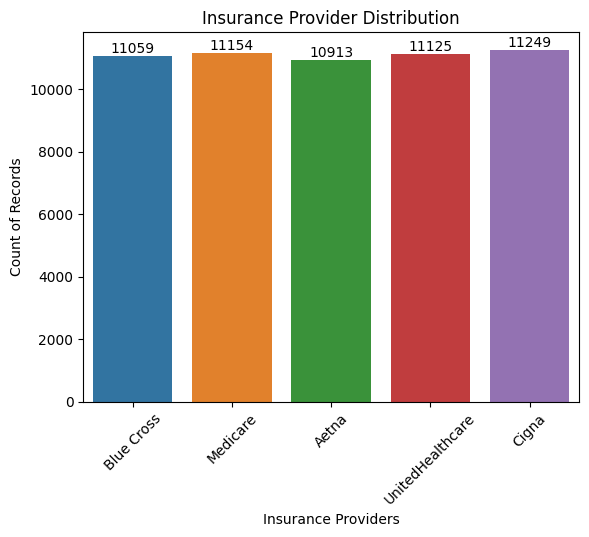

In [ ]:
values = sns.countplot(data=data, x='Insurance Provider', hue='Insurance Provider')

for container in values.containers:
    values.bar_label(container)

plt.title('Insurance Provider Distribution')
plt.xlabel('Insurance Providers')
plt.ylabel('Count of Records')
plt.xticks(rotation=45)
plt.show()

### Step 11: Histogram to denote Age Distribution Line Chart for different Age Ranges

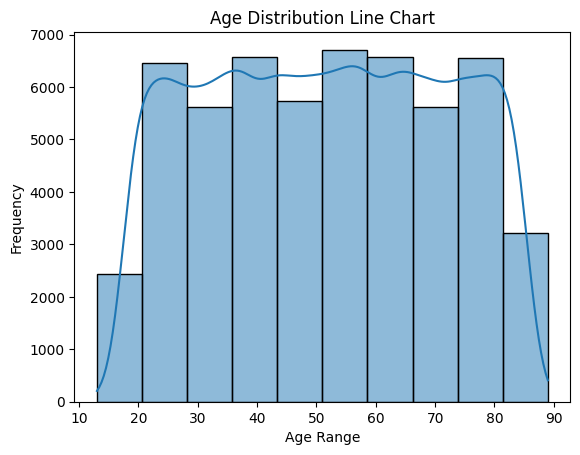

In [ ]:
sns.histplot(data["Age"], bins=10, kde=True)
plt.title("Age Distribution Line Chart")
plt.xlabel("Age Range")
plt.ylabel("Frequency")
plt.show()

### Step 12: Pie Chart to show Percentage distribution of different Test Results

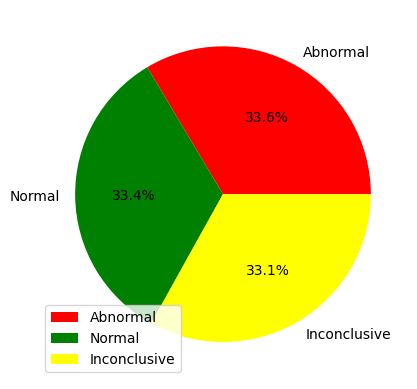

In [ ]:
plt.pie(data['Test Results'].value_counts(normalize=True) * 100, colors=['red', 'green', 'yellow'], labels=['Abnormal', 'Normal', 'Inconclusive'], autopct='%1.1f%%')
plt.legend(loc='lower left')
plt.show()